In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:

# Step 1: Load the Dataset
data_path = "moviereviews.tsv"
df = pd.read_csv(data_path, sep='\t')


In [7]:
# Step 2: Check for Null Values
print("Checking for Null Values:")
print(df.isnull().sum())

# Drop any rows with null values or empty strings
df.dropna(inplace=True)
df = df[~df['review'].str.isspace()]

Checking for Null Values:
label      0
review    35
dtype: int64


In [8]:
# Step 3: Split Dataset into Train and Test
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization using TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 4: Text Classification using Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [12]:
from sklearn.metrics import roc_auc_score


# Predict and Evaluate
nb_predictions = nb_model.predict(X_test_tfidf)
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
print("Confusion Matrix - Naive Bayes:\n", nb_conf_matrix)
print("Classification Report - Naive Bayes:\n", classification_report(y_test, nb_predictions))
# Calculate ROC AUC Score

# Convert labels to binary format for ROC AUC calculation
y_test_binary = y_test.apply(lambda x: 1 if x == 'pos' else 0)
nb_predictions_binary = [1 if pred == 'pos' else 0 for pred in nb_predictions]

roc_auc = roc_auc_score(y_test_binary, nb_predictions_binary)
print("ROC AUC Score - Naive Bayes:", roc_auc)

Confusion Matrix - Naive Bayes:
 [[165  23]
 [ 45 155]]
Classification Report - Naive Bayes:
               precision    recall  f1-score   support

         neg       0.79      0.88      0.83       188
         pos       0.87      0.78      0.82       200

    accuracy                           0.82       388
   macro avg       0.83      0.83      0.82       388
weighted avg       0.83      0.82      0.82       388

ROC AUC Score - Naive Bayes: 0.8263297872340425


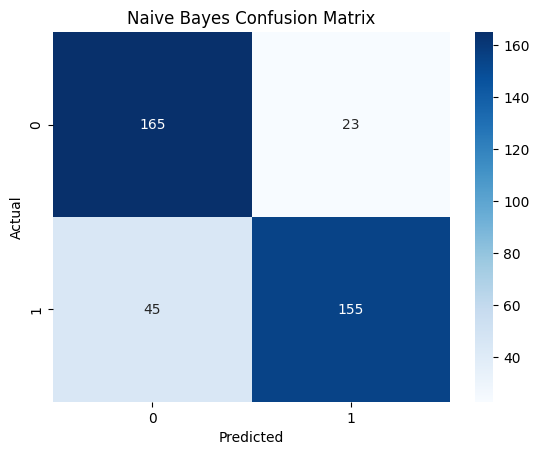

In [10]:
# Visualize Confusion Matrix
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [11]:

# Step 7: Test Model with Random Tweets
def test_model(model, vectorizer, samples):
    sample_vectors = vectorizer.transform(samples)
    predictions = model.predict(sample_vectors)
    return predictions

random_samples = [
    "The movie was fantastic, a complete masterpiece!",
    "I hated the film, it was so boring and pointless.",
    "An average film with some good moments but nothing exceptional.",
]

print("Testing Naive Bayes with Random Samples:")
print(test_model(nb_model, tfidf, random_samples))

Testing Naive Bayes with Random Samples:
['pos' 'neg' 'pos']


Confusion Matrix - SVM:
 [[151  37]
 [ 33 167]]
Classification Report - SVM:
               precision    recall  f1-score   support

         neg       0.82      0.80      0.81       188
         pos       0.82      0.83      0.83       200

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388

ROC AUC Score - SVM: 0.8190957446808511


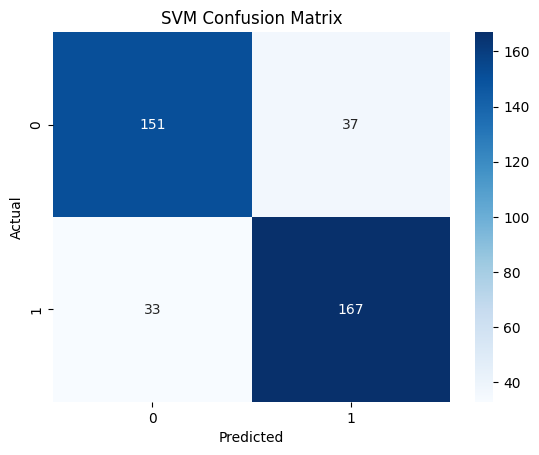

Testing SVM with Random Samples:
['pos' 'neg' 'pos']


In [13]:
# Step 4: Text Classification using Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Predict and Evaluate
svm_predictions = svm_model.predict(X_test_tfidf)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix - SVM:\n", svm_conf_matrix)
print("Classification Report - SVM:\n", classification_report(y_test, svm_predictions))

# Calculate ROC AUC Score
svm_predictions_binary = [1 if pred == 'pos' else 0 for pred in svm_predictions]
roc_auc_svm = roc_auc_score(y_test_binary, svm_predictions_binary)
print("ROC AUC Score - SVM:", roc_auc_svm)

# Visualize Confusion Matrix
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test SVM Model with Random Samples
print("Testing SVM with Random Samples:")
print(test_model(svm_model, tfidf, random_samples))